# Results and Testing

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

In [3]:
results = pd.read_csv("results.csv", index_col = 0)

In [4]:
results

,Model,Classifier,Accuracy,Balanced Score,F1 Score
0,0,Random Forest,0.646740,0.336719,0.675347
1,0,SVC,0.648684,0.204975,0.622821
2,0,XGBoost,0.653513,0.352869,0.681627
3,1,Random Forest,0.659380,0.327566,0.690584
4,1,SVC,0.607000,0.247482,0.666549
5,1,XGBoost,0.666686,0.363703,0.692729
6,2,Random Forest,0.839265,0.664120,0.856513
7,2,SVC,0.793366,0.576350,0.828334
8,2,XGBoost,0.833373,0.646736,0.853974


In [10]:
rf = results[results['Classifier']=='Random Forest']

In [6]:
svc = results[results['Classifier']=='SVC']
xgb = results[results['Classifier']=='XGBoost']

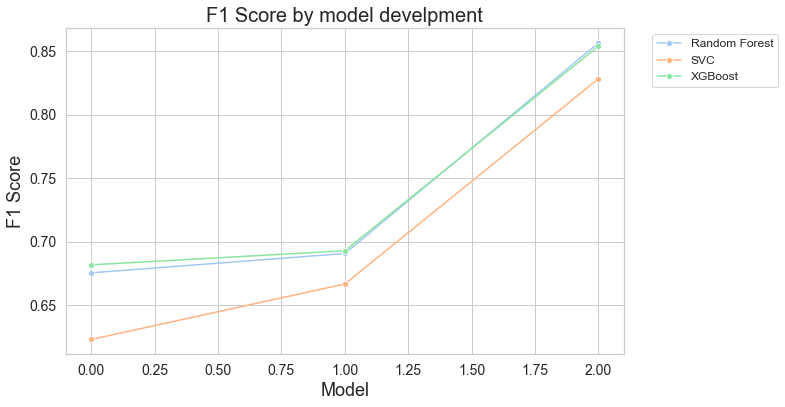

In [16]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10,6))

sns.lineplot(data=results, x='Model', y='F1 Score', hue = 'Classifier', palette = 'pastel', marker= "o")

plt.title('F1 Score by model develpment', size=20)
plt.legend(['Random Forest', 'SVC', 'XGBoost'], fontsize=12, bbox_to_anchor=(1.04, 1))
plt.ylabel('F1 Score', size=18)
plt.yticks(size=14)
plt.xlabel('Model', size=18)
plt.xticks(size=14)

#plt.savefig('../../output/figures/FireCausesPerYear.png', dpi=300)
plt.show()

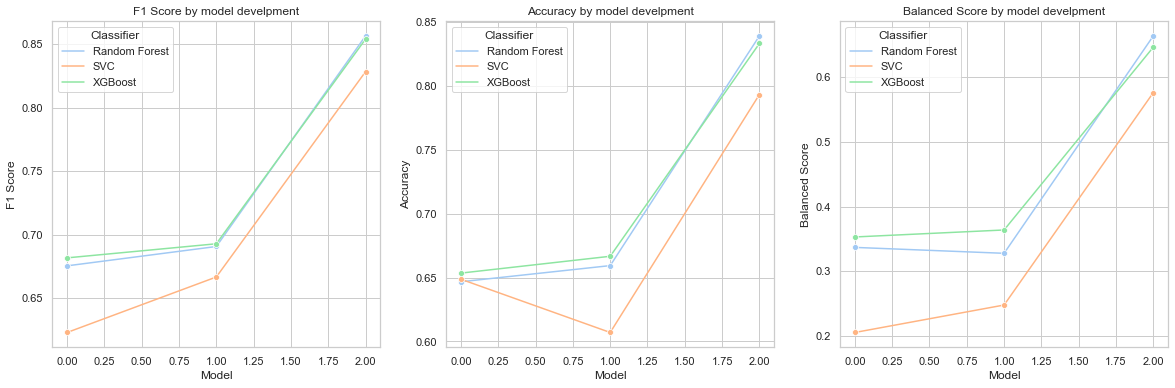

In [20]:
fig,axs = plt.subplots(1,3, figsize = (20,6))

sns.lineplot(data=results, x='Model', y='F1 Score', hue = 'Classifier', palette = 'pastel', marker= "o", ax=axs[0]).set(title='F1 Score by model develpment')
sns.lineplot(data=results, x='Model', y='Accuracy', hue = 'Classifier', palette = 'pastel', marker= "o", ax=axs[1]).set(title='Accuracy by model develpment')
sns.lineplot(data=results, x='Model', y='Balanced Score', hue = 'Classifier', palette = 'pastel', marker= "o", ax=axs[2]).set(title='Balanced Score by model develpment')

plt.savefig('figures/Results.png', dpi=300)
plt.show()

### Testing the Pickle

In [17]:
import pickle

In [18]:
model = pickle.load(open('../scripts/model2.p','rb'))

In [19]:
X_test.head(1).T

,58883
FIRE_YEAR,2011
DISCOVERY_DOY,223
FIRE_SIZE,1.0
LATITUDE,40.656811
LONGITUDE,-122.92156
DISC_MONTH,8
DISC_DAY,11
FIRE_DURATION,1
DISC_DAYOFWEEK,3
OWNER_DESCR,MISSING/NOT SPECIFIED


In [20]:
test = {'FIRE_YEAR':2011, 
       'DISCOVERY_DOY':223, 
       'FIRE_SIZE':1.0,
       'LATITUDE':40.656811,
       'LONGITUDE':-122.92156, 
       'DISC_MONTH':8, 
       'DISC_DAY':11,
       'FIRE_DURATION':1,
       'DISC_DAYOFWEEK':3,
       'OWNER_DESCR': 'MISSING/NOT SPECIFIED',
       'Elevation':765.0,
       'Temperature (2 m)':26.0,
       'Wind Gusts (10 m)':19.0,
       'Soil Temperature (0-7 cm)':24.0,
       'Soil Temperature (7-28 cm)':23.0, 
       'Maximum Temperature (2 m)':34.0, 
       'Minimum Temperature (2 m)':18.0, 
       'Precipitation Sum':0.0, 
       'Rain Sum':0.0, 
       'Snowfall Sum':0.0}

In [29]:
df_test = pd.DataFrame(test.values(), index=test.keys()).transpose()

In [31]:
result = model.predict(df_test)

In [32]:
result[0]

2

In [21]:
import datetime as dt

In [22]:
date = dt.datetime(2011, 8, 11)

In [23]:
date.year

2011

In [24]:
date.timetuple().tm_yday

223

In [25]:
date.weekday()

3

## Labeling results

In [2]:
df = pd.read_csv("../data/data_weather.csv", index_col = 0)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_base = df[['FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 
              'DISC_MONTH', 'DISC_DAY', 'FIRE_DURATION', 'DISC_DAYOFWEEK', 'OWNER_DESCR', 
              'Elevation', 'Temperature (2 m)', 'Wind Gusts (10 m)', 
              'Soil Temperature (0-7 cm)', 'Soil Temperature (7-28 cm)',
              'Maximum Temperature (2 m)', 'Minimum Temperature (2 m)',
              'Precipitation Sum', 'Rain Sum', 'Snowfall Sum']]
df_base.dropna(inplace = True, axis = 0)

In [5]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    else:
        cause = 3
    return cause

In [6]:
df_base['LABEL'] = df_base['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x))

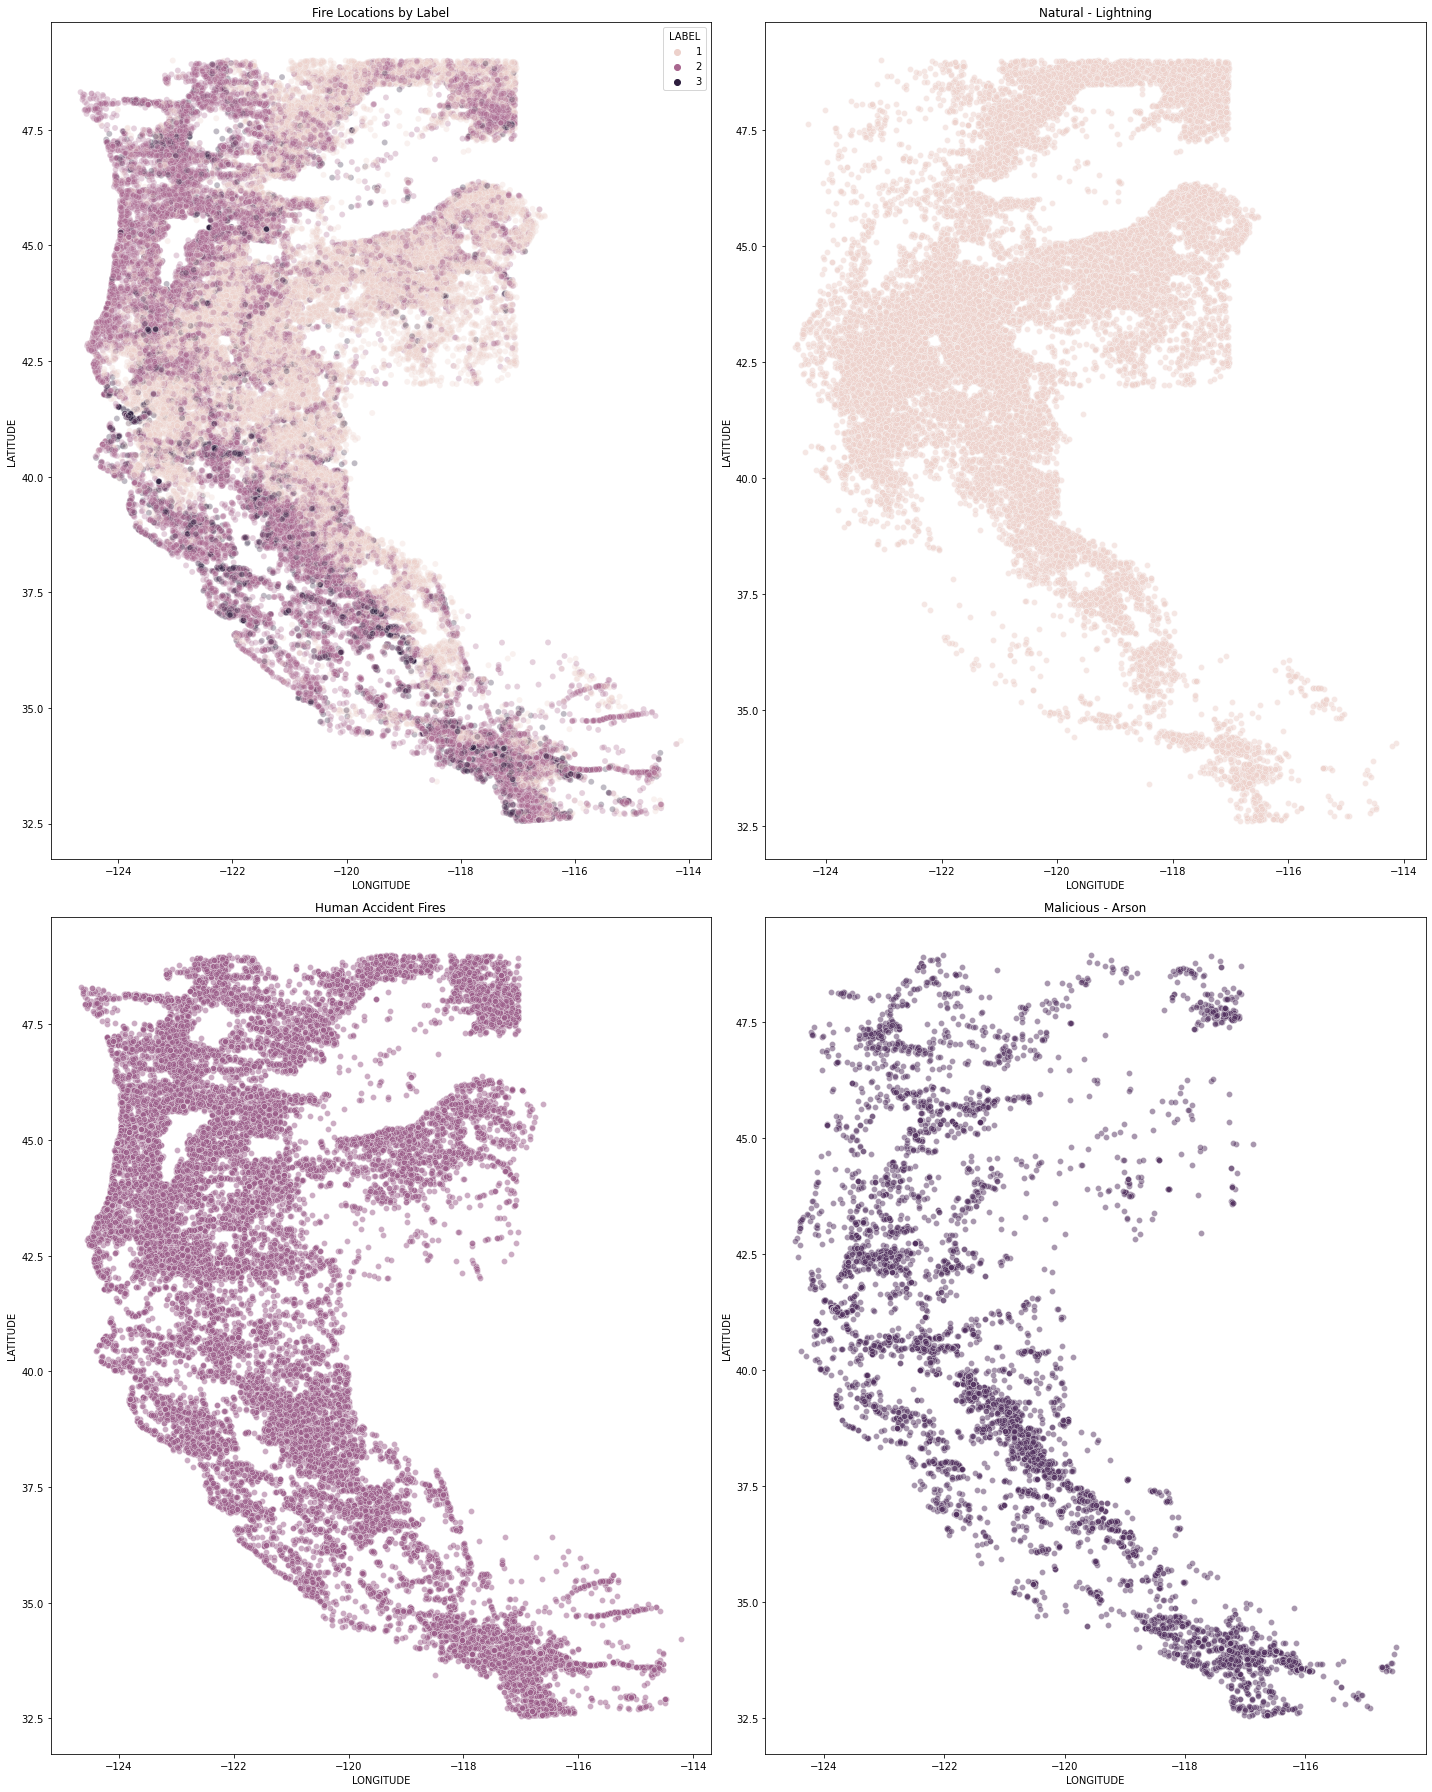

In [10]:
#geo plots of the top 3 causes
fig,axs = plt.subplots(2,2,figsize = (20,25))

sns.scatterplot(data=df_base, x="LONGITUDE", y="LATITUDE", hue="LABEL", legend=['Natural', 'Accident', 'Malicious'], alpha=.3, ax=axs[0, 0]).set(title='Fire Locations by Label')  
sns.scatterplot(data=df_base[df_base['LABEL']==1], x="LONGITUDE", y="LATITUDE", color = '#edd1cb', alpha=.5, ax=axs[0, 1]).set(title='Natural - Lightning') 

sns.scatterplot(data=df_base[df_base['LABEL']==2], x="LONGITUDE", y="LATITUDE", color = '#9a5b88', alpha=.5, ax=axs[1,0]).set(title='Human Accident Fires') 
sns.scatterplot(data=df_base[df_base['LABEL']==3], x="LONGITUDE", y="LATITUDE", color = '#52315f', alpha=.5, ax=axs[1,1]).set(title='Malicious - Arson') 

plt.savefig('figures/Result_Labels_Map.png', dpi=300)
fig.tight_layout()

In [44]:
pal = sns.cubehelix_palette(8)

In [49]:
pal.as_hex()

['#edd1cb',
 '#e1b1b4',
 '#cf91a3',
 '#b77495',
 '#9a5b88',
 '#774576',
 '#52315f',
 '#2d1e3e']

In [50]:
pal.as_hex()[4]

'#9a5b88'

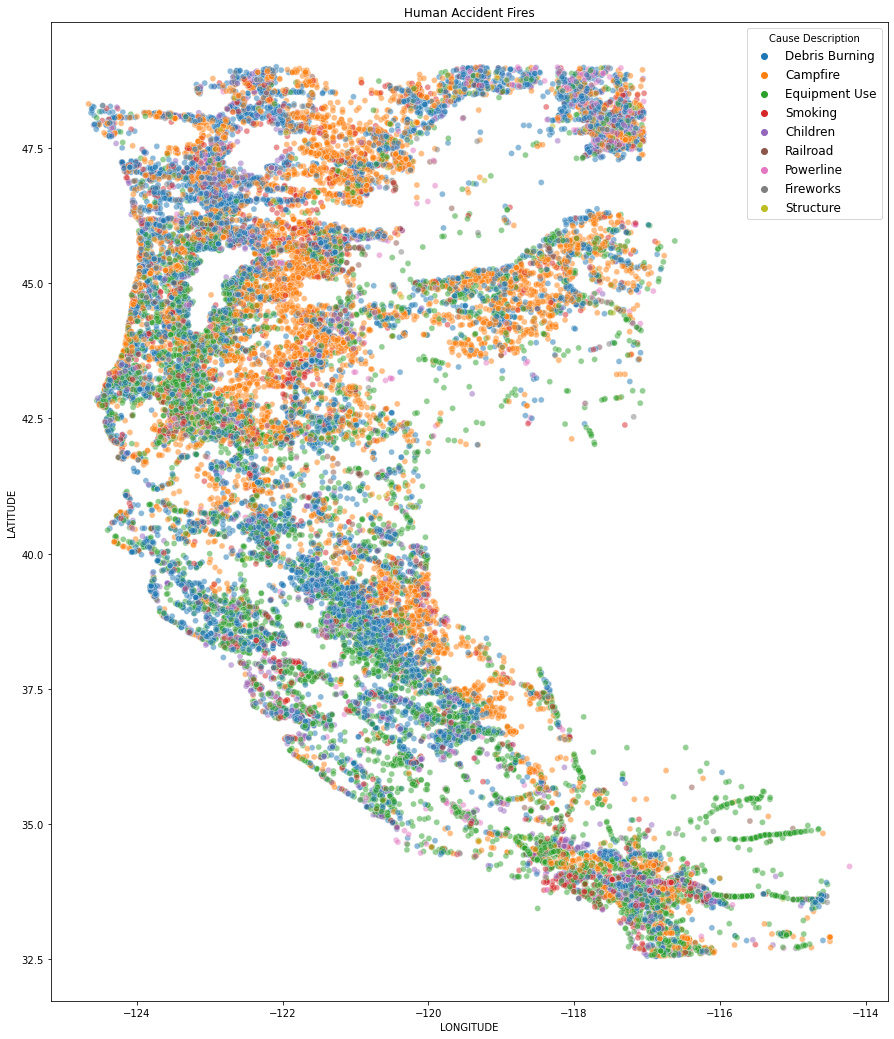

In [18]:
fig,axs = plt.subplots(figsize = (15, 18))
sns.scatterplot(data=df_base[df_base['LABEL']==2], x="LONGITUDE", y="LATITUDE", hue = 'STAT_CAUSE_DESCR', alpha=.5).set(title='Human Accident Fires') 
plt.legend(title = 'Cause Description', fontsize = 'large')
plt.savefig('figures/Result_Labels_Map_2.png', dpi=300)